<a href="https://colab.research.google.com/github/Branis333/Water-Quality-Model-peer9/blob/Ian/formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [2]:
!pip install -U scikeras
# !pip install -U scikit-learn
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from scikeras.wrappers import  KerasClassifier
from matplotlib import pyplot
from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score

Plot the Data Appropriately

In [4]:
data = pd.read_csv('/content/water_potability.csv')
# print(data.shape)
filled_data = data.fillna(data.mean(),axis=0)
# data.shape[0] - dropped_rows.shape[0] 1275 rows with N/A values so 38.9% of the dataset
filled_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [5]:
# generate 2d classification dataset
X , Y = filled_data.drop('Potability',axis=1) , filled_data['Potability']
scaler = StandardScaler()
cols_trans = ColumnTransformer(transformers=[('scaler',scaler,X.columns)])
# sx_arr = cols_trans.fit_transform(X)
# X = pd.DataFrame(sx_arr)
# X

In [6]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.3)
val_X_train , val_X_test , val_Y_train , val_Y_test = train_test_split(X_train,Y_train,test_size=0.15)
# val_X_train

# Each Memeber Defines their model Here

In [9]:
#Model Definition by member 1
def model_Ian_Ganza():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(9,)),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  adagrad = Adagrad(learning_rate=0.03)
  model.compile(optimizer=adagrad, loss='binary_crossentropy', metrics=['accuracy'])
  return model


krModel = KerasClassifier(build_fn=model_Ian_Ganza,batch_size=324,epochs=150)
pipeline = Pipeline(steps=[('preprocessor',cols_trans),('model',krModel)])
early_stop = EarlyStopping(patience=5,monitor='val_loss',mode='min',restore_best_weights=True)

# Start the training Process

In [12]:

#fit model
val_X_processed = pipeline.named_steps['preprocessor'].transform(val_X_train)

history = pipeline.fit(X_train, Y_train, model__validation_data=(val_X_processed, val_Y_train),model__callbacks=[early_stop])
# Adding model because of the name error , because of the function wrapper that can't allow to validation and callbacks to be passed at that level
# evaluate the model
# _, train_acc = pipeline.evaluate(X_train, Y_train, verbose=0)
# _, test_acc = pipeline.evaluate(X_test, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# # plot training history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5718 - loss: 0.6878 - val_accuracy: 0.6018 - val_loss: 0.6813
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5689 - loss: 0.6867 - val_accuracy: 0.6008 - val_loss: 0.6766
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6144 - loss: 0.6739 - val_accuracy: 0.6008 - val_loss: 0.6768
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6023 - loss: 0.6755 - val_accuracy: 0.6008 - val_loss: 0.6744
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5950 - loss: 0.6749 - val_accuracy: 0.6008 - val_loss: 0.6726
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6093 - loss: 0.6763 - val_accuracy: 0.6008 - val_loss: 0.6729
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5973 - loss: 0.6749 - val_accuracy: 0.6008 - val_loss: 0.6710
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6077 - loss: 0.6742 - val_accuracy: 0.6008 - val_loss: 0.6704
Epoc

Train: 0.687, Test: 0.686


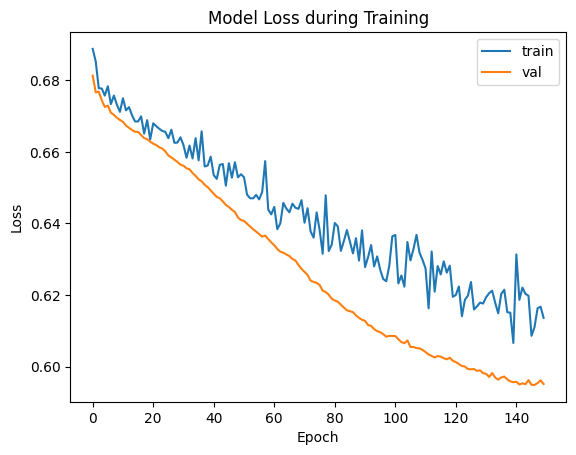

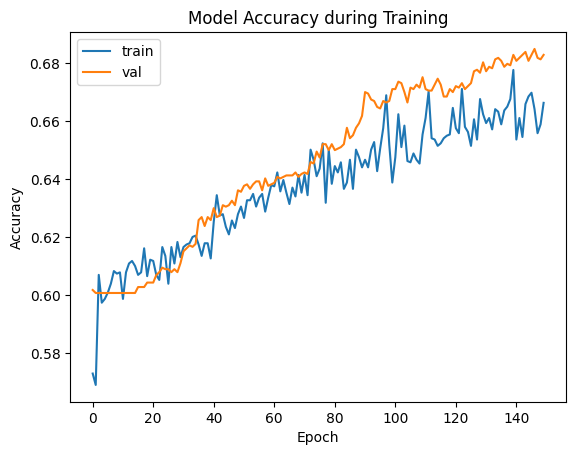

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,868 (269.02 KB)

 Trainable params: 34,433 (134.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,435 (134.52 KB)

In [13]:
# Use the score method of the pipeline, which internally calls the score method of the final estimator (KerasRegressor)
# train_acc = pipeline.score(X_train, Y_train)
# test_acc = pipeline.score(X_test, Y_test)

# We need to access the history from the fitted model step within the pipeline
# The history object is attached to the fitted KerasRegressor instance
# Scikeras stores the history in the 'history_' attribute after fitting.
# The fitted KerasRegressor instance is accessed via pipeline.named_steps['model']
# Access the History object from the history_ attribute of the fitted KerasRegressor
# The history_ attribute in Scikeras directly contains the dictionary of metrics
model_history = pipeline.named_steps['model'].history_

# Access the underlying Keras model from the fitted KerasRegressor
keras_model = pipeline.named_steps['model'].model_

# Use the evaluate method of the Keras model for evaluation
# First, apply the preprocessing steps to the data before evaluating
X_train_processed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)

# Evaluate on the preprocessed data
train_loss, train_acc = keras_model.evaluate(X_train_processed, Y_train, verbose=0)
test_loss, test_acc = keras_model.evaluate(X_test_processed, Y_test, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
# Access the history object from the fitted KerasRegressor in the pipeline
# The history_ attribute already contains the training history including validation data
pyplot.plot(model_history['loss'], label='train')
pyplot.plot(model_history['val_loss'], label='val') # Use 'val_loss' as provided in validation_data
pyplot.legend()
pyplot.title('Model Loss during Training')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.show()

pyplot.plot(model_history['accuracy'], label='train')
pyplot.plot(model_history['val_accuracy'], label='val') # Use 'val_accuracy' corresponding to 'val_loss'
pyplot.legend()
pyplot.title('Model Accuracy during Training')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.show()


# Access the Keras model from the pipeline to display the summary
# The Keras model is available after fitting in the 'model_' attribute of the KerasRegressor
pipeline.named_steps['model'].model_.summary()

Saving MDO.png to MDO (1).png


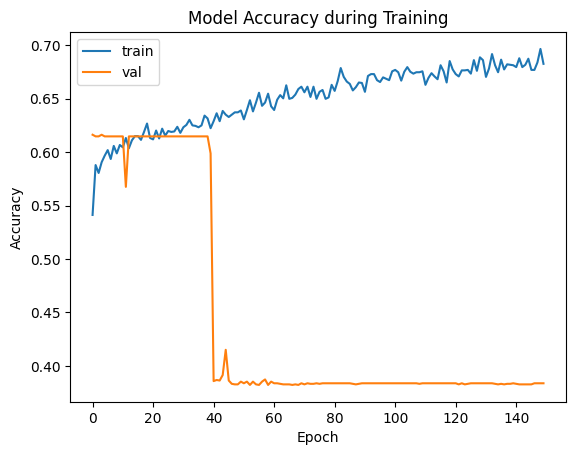

In [32]:
from google.colab import files
uploaded = files.upload()
from IPython.display import Image
Image(filename='MDO.png')

In [14]:
# Access the underlying Keras model from the fitted KerasRegressor in the pipeline
keras_model = pipeline.named_steps['model'].model_

# Apply the preprocessing steps to the test data before predicting
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)

# Use the predict method of the Keras model on the preprocessed data
y_pred_prob = keras_model.predict(X_test_processed)

# Convert to class labels using threshold (0.5 by default)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Now compute accuracy
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("f1_score:", f1_score(Y_test, y_pred))


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.6856561546286877
Precision: 0.7195121951219512
Recall: 0.30971128608923887
f1_score: 0.43302752293577984
